# Introduction 

We study iteration methods for the numerical solution of equations $F(x)$. We consider 2 simple methods; *binary search* and *fixed-point iteration*.

The examples to be used are 

$$ F_1(x) := 2x - 3\sin(x) + 5 $$
$$ F_2(x) := x^3 - 8.5x^2 + 20x - 8 \equiv (x - .5)(x - 4)^2 $$

which are refered to as `func1` and `func2` respectively in the code.

### Roots of $F_1$

Note that 
$$ x > -1 \implies F_1(x) > 2(-1) - 3(1) + 5 = 0 $$
$$ x < -4 \implies F_1(x) < 2(-4) - 3(-1) + 5 = 0 $$
and so any root of $F_1$ is on the interval $(-4, -1)$.

Plotting $F_1$ on this interval shows there is only one such root.

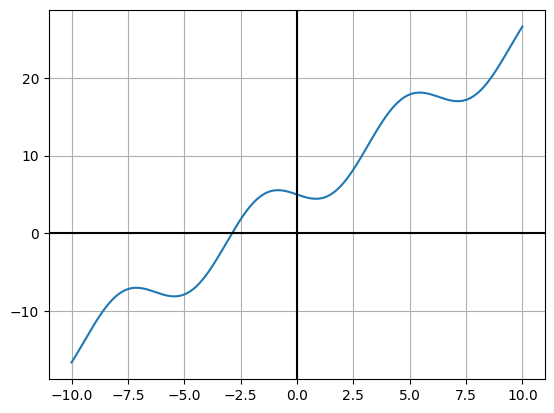

In [1]:
import matplotlib.pyplot as plt
from findroots.functions import func1
from findroots.plot import plot

plot(func1, on=(-10, 10), step=1e-5)